# This file is used for calculating TI electrode field

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import nibabel.freesurfer.mghformat as mgh

In [2]:
fs_dir_result = "/results/EMF/"

In [3]:
fs_dir = "/data/EMF/"
field ="normal"
field1_name = f'E1_{field}_field_fs_ico5'
field2_name = f'E2_{field}_field_fs_ico5'

In [4]:
mgh_file = mgh.load(f"{fs_dir}/lh.{field1_name}.mgh")
E1_lh = np.squeeze(mgh_file.get_fdata())

mgh_file = mgh.load(f"{fs_dir}/rh.{field1_name}.mgh")
E1_rh = np.squeeze(mgh_file.get_fdata())

mgh_file = mgh.load(f"{fs_dir}/lh.{field2_name}.mgh")
E2_lh = np.squeeze(mgh_file.get_fdata())

mgh_file = mgh.load(f"{fs_dir}/rh.{field2_name}.mgh")
E2_rh = np.squeeze(mgh_file.get_fdata())

In [5]:
# Compute the sinusoidal E fields from the static tDCS fields
f = 1000  # tDCS frequency
sf = 10500  # sampling frequency
time = np.arange(0, 1, 1 / sf)
E1_lh_t = []
for t in time:
    E1_lh_t.append(E1_lh * math.sin(2 * math.pi * f * t))
E1_lh_t = np.asarray(E1_lh_t)

E1_rh_t = []
for t in time:
    E1_rh_t.append(E1_rh * math.sin(2 * math.pi * f * t))
E1_rh_t = np.asarray(E1_rh_t)

In [6]:
f = 1005  # tDCS frequency
sf = 10500  # sampling frequency
time = np.arange(0, 1, 1 / sf)
E2_lh_t = []
for t in time:
    E2_lh_t.append(E2_lh * math.sin(2 * math.pi * f * t))
E2_lh_t = np.asarray(E2_lh_t)

E2_rh_t = []
for t in time:
    E2_rh_t.append(E2_rh * math.sin(2 * math.pi * f * t))
E2_rh_t = np.asarray(E2_rh_t)

In [7]:
# Compute the TI (sum of two sinusoidal E fields)

TI_lh = E1_lh_t + E2_lh_t
TI_rh = E1_rh_t + E2_rh_t

In [12]:
import os
if not os.path.exists(fs_dir_result):
    os.makedirs(fs_dir_result)

In [9]:
# Compute the TI envelope

analytic_signal_lh = hilbert(TI_lh, axis=0)
amplitude_envelope_lh = np.abs(analytic_signal_lh)

analytic_signal_rh = hilbert(TI_rh, axis=0)
amplitude_envelope_rh = np.abs(analytic_signal_rh)

np.savez_compressed(f'{fs_dir_result}/TI_{field}_lh.npy', time=time, envelope=amplitude_envelope_lh)
np.savez_compressed(f'{fs_dir_result}/TI_{field}_rh.npy', time=time, envelope=amplitude_envelope_rh)


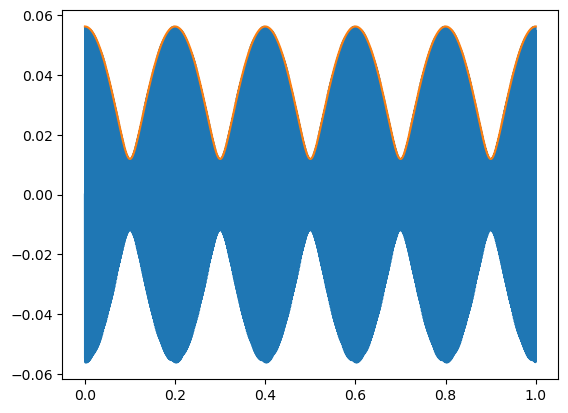

In [10]:
# Sanity checks
N_vec = 4
plt.figure()
plt.plot(time, TI_lh[:, N_vec])
plt.plot(time, abs(amplitude_envelope_lh[:, N_vec]))
plt.show()